In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Importing tf, Keras and other useful libs
import tensorflow as tf
import os
from os import listdir, makedirs
from os.path import join, exists, expanduser
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from glob import glob
import numpy as np

In [3]:
#useful imports
import pickle
!pip install scikit-optimize
import skopt
from skopt.utils import use_named_args
from skopt.callbacks import CheckpointSaver
from collections import namedtuple

     |████████████████████████████████| 81kB 2.2MB/s 


In [4]:
#set up saving. If old data are present, they are loaded
Hyperpars = namedtuple('Hyperpars', ['learning_rate', 'alpha', 'dropout'])
HPO_save_path = '/content/drive/My Drive/Progetto Advanced Machine Learning/Model Checkpoints/'
dict_save_path = HPO_save_path + 'Custom Model HPO History Dictionary.pickle'
checkpoint_save_path = HPO_save_path + 'Custom Model HPO Checkpoint.pickle'
if os.path.isfile(dict_save_path):
  with open(dict_save_path, 'rb') as f:
    print('Loading previous history...')
    history = pickle.load(f)
else:
  print('No previous history found')
  history = dict()
if os.path.isfile(checkpoint_save_path):
  with open(checkpoint_save_path, 'rb') as f:
    print('Loading previous results...')
    results = skopt.load(checkpoint_save_path)
else:
  print('No previous results found')
checkpoint_saver = CheckpointSaver(checkpoint_save_path)

No previous history found
No previous results found


In [0]:
#set random seeds to get reproducible results
np.random.seed(1)
tf.random.set_seed(2)

def create_model(learning_rate, alpha, dropout):
  model_path = '/content/drive/My Drive/Progetto Advanced Machine Learning/Model Checkpoints/Custom Model 1 2020-06-01 10:56:21.010759.hdf5'
  model = tf.keras.models.load_model(model_path)
  x = model.layers[-2].output
  x = Dropout(dropout)(x)
  predictions = Dense(120, activation='softmax', name='prediction', kernel_regularizer=tf.keras.regularizers.l2(alpha))(x)
  model = Model(inputs=model.inputs, outputs=predictions)
  for layer in model.layers[:-2]:
    layer.trainable = False
  model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy']) 
  return model

#declare the search space
SEARCH_SPACE = [skopt.space.Real(0.0001, 0.1, name='learning_rate', prior='log-uniform'),
                skopt.space.Real(1e-9, 1, name='alpha', prior='log-uniform'),
                skopt.space.Real(0.0001, 0.95, name='dropout', prior='log-uniform')]

@use_named_args(SEARCH_SPACE)
def fitness(learning_rate, alpha, dropout):
  print('ε: {}, ɑ {}, dropout {}'.format(learning_rate, alpha, dropout))
  hyperpars = Hyperpars(learning_rate, alpha, dropout)
  print(len(history))
  if hyperpars in history:
    print('REPEATING POINTS!!!')
  model = create_model(learning_rate, alpha, dropout)
  #compile generators
  train_batches = train_datagenerator.flow_from_directory(train_out_path, target_size=image_size, color_mode="rgb", class_mode="categorical" ,  batch_size=32, subset='training', seed = 20052020)
  val_batches = train_datagenerator.flow_from_directory(directory=train_out_path, target_size=image_size, color_mode="rgb", class_mode="categorical" ,  batch_size=32, subset='validation', shuffle=False, seed = 20052020)
  #train
  early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
  training_results = model.fit(train_batches, epochs=5, verbose=1, shuffle=True, validation_data=val_batches, workers=2)
  history[hyperpars] = training_results.history
  with open(dict_save_path, 'wb') as f:
    pickle.dump(history, f)
  return training_results.history['val_accuracy'][-1]

In [0]:
results_path = '/content/drive/My Drive/Progetto Advanced Machine Learning/Model Checkpoints/Custom Model HPO Merged.pickle'
results = skopt.load(results_path)

In [7]:
!pip install scikit-optimize[plots]

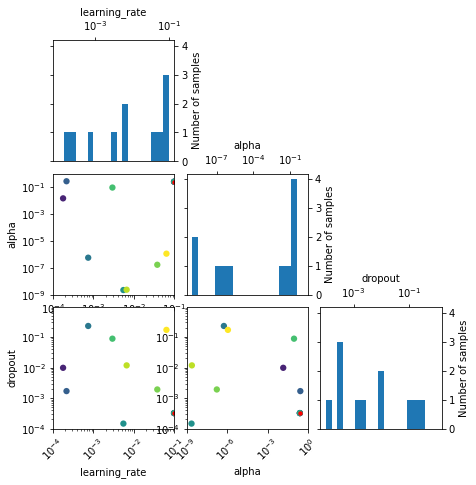

In [16]:
import skopt.plots
_ = skopt.plots.plot_evaluations(results)

IndexError: ignored

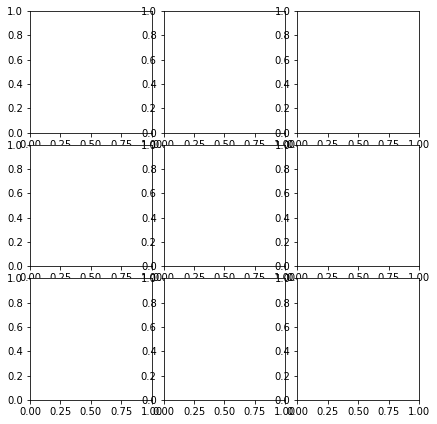

In [17]:
fig2 = skopt.plots.plot_objective(results)
fig2

In [0]:
results

          fun: 0.09215214848518372
    func_vals: array([0.09215215, 0.88323528, 0.11444435, 0.85389906, 0.85887128,
       0.92077565, 0.13739952, 0.66346234, 0.89533436, 0.89599735,
       0.81727022])
       models: []
 random_state: RandomState(MT19937) at 0x7FD2EA85F258
        space: Space([Real(low=0.0001, high=0.1, prior='log-uniform', transform='identity'),
       Real(low=1e-09, high=1, prior='log-uniform', transform='identity'),
       Real(low=0.0001, high=0.95, prior='log-uniform', transform='identity')])
        specs: {'args': {'model_queue_size': None, 'n_jobs': 1, 'kappa': 1.96, 'xi': 0.01, 'n_restarts_optimizer': 5, 'n_points': 10000, 'callback': <skopt.callbacks.CheckpointSaver object at 0x7fd2df0256d8>, 'verbose': False, 'random_state': None, 'y0': None, 'x0': None, 'acq_optimizer': 'sampling', 'acq_func': 'EI', 'n_random_starts': 10, 'n_calls': 10, 'base_estimator': 'ET', 'dimensions': [Real(low=0.0001, high=0.1, prior='log-uniform', transform='identity'), Real(low